pip install pandas-datareader
pip install yfinance

In [4]:
import os
import numpy as np
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [5]:
from pandas_datareader import data as pdr
import yfinance as yfin

yfin.pdr_override()

In [6]:
%matplotlib inline 

In [ ]:
#ACN
#TSLA

## Utilities

In [102]:
def df_fragment(col_name, sdate, edate, df):
    mask = (df['Date'] >= sdate) & (df['Date'] <= edate)
    
    fragment = df.loc[mask][col_name]
    
    return fragment

In [7]:
def data_to_path(ticker, base_dir='../data_samples/stocks/'):
    return os.path.join(base_dir, '{}.csv'.format(ticker))

In [8]:
def save_to_csv(ticker, syear, smonth, sday, eyear, emonth, eday):
    start = dt.datetime(syear, smonth, sday)
    end   = dt.datetime(eyear, emonth, eday)
    
    df = pdr.get_data_yahoo(ticker, start, end)
    df.to_csv(data_to_path(ticker))
    return df

In [242]:
frame = save_to_csv('EURUSD=X', 2018, 1, 1, 2021, 12, 20)

[*********************100%***********************]  1 of 1 completed


In [243]:
frame

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,1.200495,1.201504,1.199904,1.200495,1.200495,0
2018-01-02,1.201086,1.208094,1.200855,1.201158,1.201158,0
2018-01-03,1.206200,1.206709,1.200495,1.206345,1.206345,0
2018-01-04,1.201129,1.209190,1.200495,1.201043,1.201043,0
2018-01-05,1.206622,1.208459,1.202154,1.206884,1.206884,0
...,...,...,...,...,...,...
2021-12-13,1.131119,1.131606,1.126354,1.131183,1.131183,0
2021-12-14,1.128337,1.132759,1.126659,1.128541,1.128541,0
2021-12-15,1.125873,1.127800,1.124923,1.126126,1.126126,0


In [107]:
def simple_plot(data, name, x_label, y_label):
    plt.figure(figsize=(18,6))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(name)
    plt.plot(data)
    plt.show()

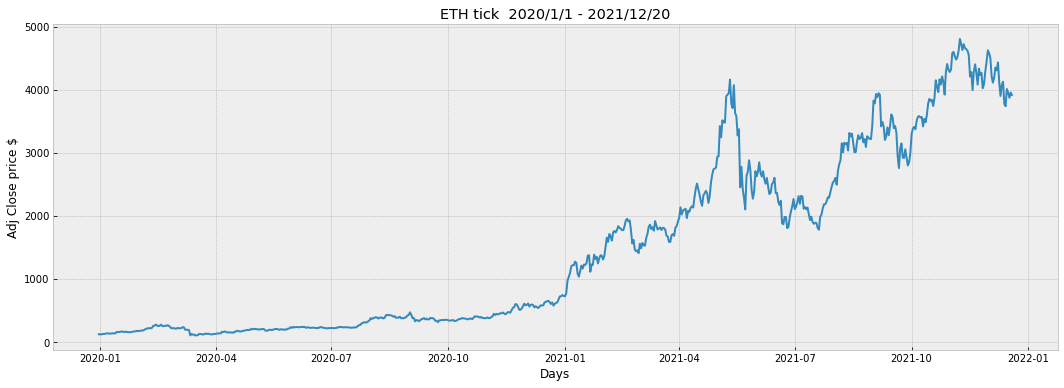

In [108]:
simple_plot(
    frame['Adj Close'], 
    'ETH tick  2020/1/1 - 2021/12/20', 
    'Days', 
    'Adj Close price $'
)

In [109]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 720 entries, 2019-12-31 to 2021-12-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       720 non-null    float64
 1   High       720 non-null    float64
 2   Low        720 non-null    float64
 3   Close      720 non-null    float64
 4   Adj Close  720 non-null    float64
 5   Volume     720 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 39.4 KB


In [110]:
frame.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<code>**daily_return[t] = (price[t] / price[t-1]) - 1**</code>

In [244]:
def add_daily_return_and_volatily(df):
    df['daily_returns'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    df['volatily'] = ((df['High'] - df['Low']) / df['Low']) * 100
    df.fillna(0, inplace=True)

In [245]:
add_daily_return_and_volatily(frame)

In [246]:
# 1.797

In [247]:
frame

,Open,High,Low,Close,Adj Close,Volume,daily_returns,volatily
Date,,,,,,,,
2018-01-01,1.200495,1.201504,1.199904,1.200495,1.200495,0,0.000000,0.133376
2018-01-02,1.201086,1.208094,1.200855,1.201158,1.201158,0,0.000553,0.602839
2018-01-03,1.206200,1.206709,1.200495,1.206345,1.206345,0,0.004319,0.517672
2018-01-04,1.201129,1.209190,1.200495,1.201043,1.201043,0,-0.004396,0.724295
2018-01-05,1.206622,1.208459,1.202154,1.206884,1.206884,0,0.004864,0.524473
...,...,...,...,...,...,...,...,...
2021-12-13,1.131119,1.131606,1.126354,1.131183,1.131183,0,0.001640,0.466220
2021-12-14,1.128337,1.132759,1.126659,1.128541,1.128541,0,-0.002336,0.541461
2021-12-15,1.125873,1.127800,1.124923,1.126126,1.126126,0,-0.002140,0.255793


In [233]:
data = frame[['Adj Close', 'Volume', 'daily_returns', 'volatily']]

In [234]:
data

,Adj Close,Volume,daily_returns,volatily
Date,,,,
2018-01-02,64.106003,21761000,0.000000,3.572341
2018-01-03,63.450001,22607500,-0.010233,3.074002
2018-01-04,62.924000,49731500,-0.008290,4.210281
2018-01-05,63.316002,22956000,0.006230,1.679488
2018-01-08,67.281998,49297000,0.062638,6.820921
...,...,...,...,...
2021-12-13,966.409973,26198500,-0.049772,5.631584
2021-12-14,958.510010,23602100,-0.008175,3.915051
2021-12-15,975.989990,25056400,0.018237,5.440345


In [116]:
X = np.array(data.drop(['Adj Close'], 1))

In [120]:
X.shape

(720, 3)

In [121]:
x_00 = X[:,0]
x_01 = X[:,1]
x_02 = X[:,2]

In [122]:
x_00_mean = np.mean(x_00)
x_01_mean = np.mean(x_01)
x_02_mean = np.mean(x_02)
print(
    f' x_00 mean: {x_00_mean}\n',
    f'x_01 mean:  {x_01_mean}\n',
    f'x_02 mean:  {x_02_mean}',
)

 x_00 mean: 20838763479.77778
 x_01 mean:  0.006200730522985633
 x_02 mean:  7.469788832833567


In [123]:
space = np.linspace(0, x_00.size,int( x_00.size))

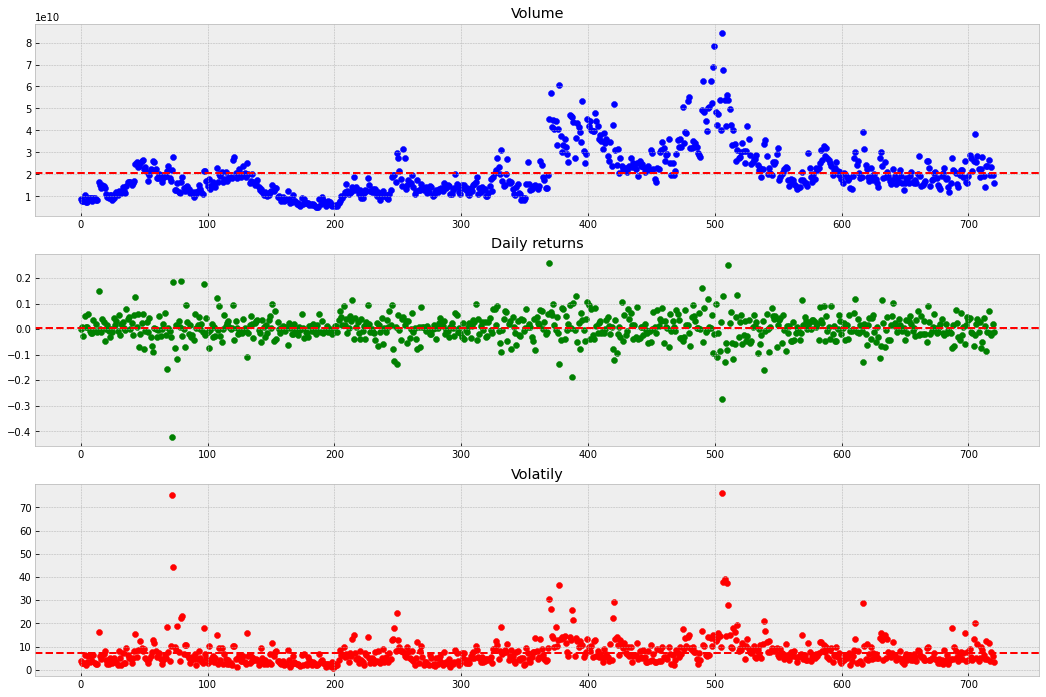

In [124]:
fig, ax = plt.subplots(3, figsize=(18, 12))
ax[0].scatter(space, x_00 ,c='b')
ax[0].set_title('Volume')
ax[0].axhline(np.mean(x_00), color='r', linestyle='dashed')
ax[1].scatter(space, x_01, c='g')
ax[1].set_title('Daily returns')
ax[1].axhline(np.mean(x_01), color='r', linestyle='dashed')
ax[2].scatter(space, x_02, c='r')
ax[2].set_title('Volatily')
ax[2].axhline(np.mean(x_02), color='r', linestyle='dashed')
plt.show()

In [133]:
y = np.array(data['Adj Close'])

In [188]:
A = pd.read_csv('../data_samples/stocks/ETH-USD.csv')

In [136]:
y = np.reshape(y,(-1, 1))

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [139]:
X_normalized = scale(X)

In [140]:
print(X_normalized.mean(axis=0))
print(X_normalized.std(axis=0))

[-3.94745964e-17 -1.97372982e-17  9.86864911e-17]
[1. 1. 1.]


In [141]:
x_0 = X_normalized[:,0]
x_1 = X_normalized[:,1]
x_2 = X_normalized[:,2]

In [142]:
x_0_mean = np.mean(x_0)
x_1_mean = np.mean(x_1)
x_2_mean = np.mean(x_2)
print(
    f' x_0 mean: {x_0_mean}\n',
    f'x_1 mean: {x_1_mean}\n',
    f'x_2 mean: {x_2_mean}',
)

 x_0 mean: -3.947459643111668e-17
 x_1 mean: -1.973729821555834e-17
 x_2 mean: 9.868649107779169e-17


In [143]:
space = np.linspace(0, x_0.size,int( x_0.size))

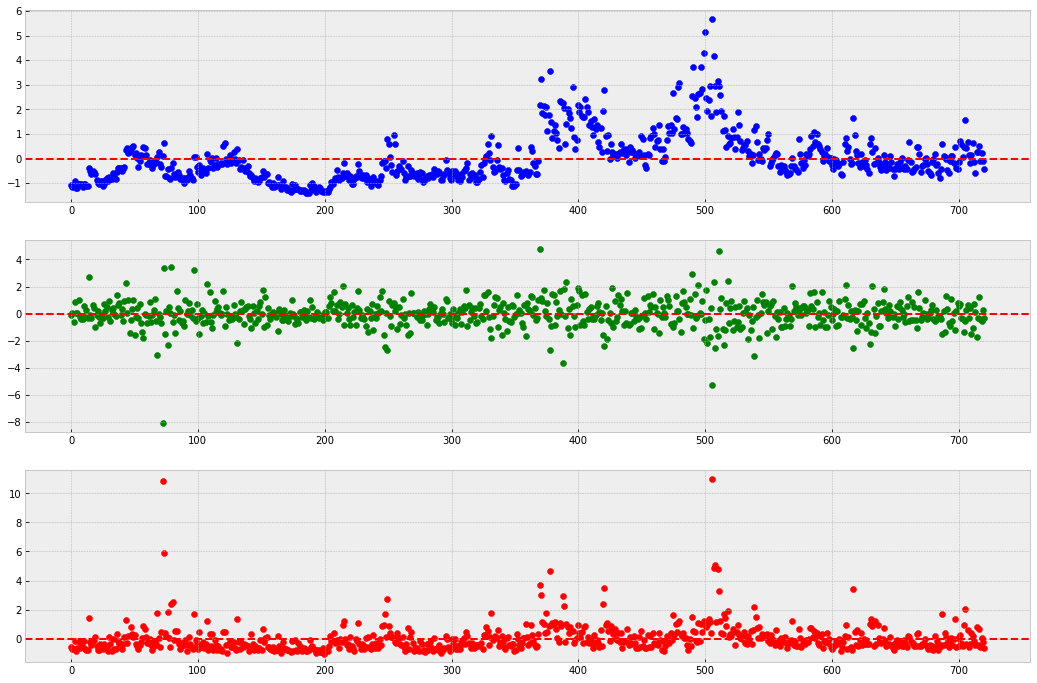

In [144]:
fig, ax = plt.subplots(3, figsize=(18, 12))
ax[0].scatter(space, x_0 ,c='b')
ax[0].axhline(np.mean(x_0), color='r', linestyle='dashed')
ax[1].scatter(space, x_1, c='g')
ax[1].axhline(np.mean(x_1), color='r', linestyle='dashed')
ax[2].scatter(space, x_2, c='r')
ax[2].axhline(np.mean(x_2), color='r', linestyle='dashed')
plt.show()

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

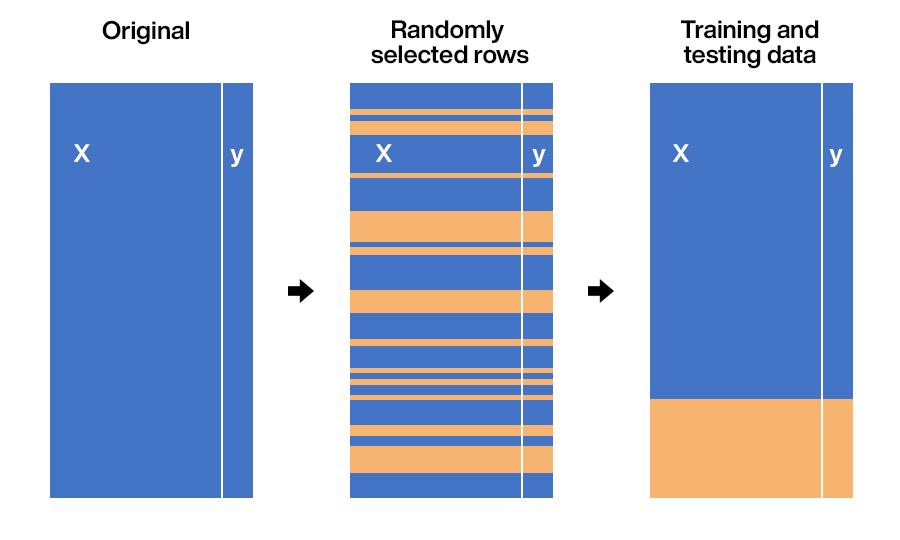

In [148]:
X[0]

array([8.93686640e+09, 0.00000000e+00, 3.83120742e+00])

In [149]:
X_train[0]

array([ 3.40606550e+10, -3.17138572e-02,  9.10955874e+00])

In [150]:
model = LinearRegression()

In [155]:
model.fit(X_train, y_train)

LinearRegression()

In [156]:
print(f"θ's: {model.coef_}")
print(f"θ0: {model.intercept_}")

θ's: [[ 7.33469305e-08  1.58295675e+02 -6.19687762e+01]]
θ0: [443.32374652]


In [157]:
model.score(X_test, y_test)

0.21432533300483203

In [158]:
model.score(X_train, y_train)

0.20714232917922337

In [162]:
ETH_price_pred = model.predict(X_test)

In [166]:
test_days = int(len(frame) * .2)
test_days

144

In [192]:
data.tail(test_days)

,Adj Close,Volume,daily_returns,volatily
Date,,,,
2021-07-29,2380.956787,16313373113,0.036756,5.412460
2021-07-30,2466.961426,20212848934,0.036122,6.345662
2021-07-31,2536.209961,18001710283,0.028070,5.253904
2021-08-01,2561.852051,22697987055,0.010110,6.921947
2021-08-02,2610.153320,22162754104,0.018854,6.146262
...,...,...,...,...
2021-12-15,4018.388672,26411188833,0.072875,11.505731
2021-12-16,3962.469727,19825531254,-0.013916,3.900639
2021-12-17,3879.486572,23143541098,-0.020942,7.581130


In [212]:
(3922.592529 - 2380.956787) / 3922.592529

0.393014500130355

In [182]:
temp  = data.tail(test_days)

In [184]:
temp['predictions'] = ETH_price_pred

C:\Users\Eivanas\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [201]:
temp.drop(['Volume', 'daily_returns', 'volatily'], 1, inplace=True)

C:\Python37\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


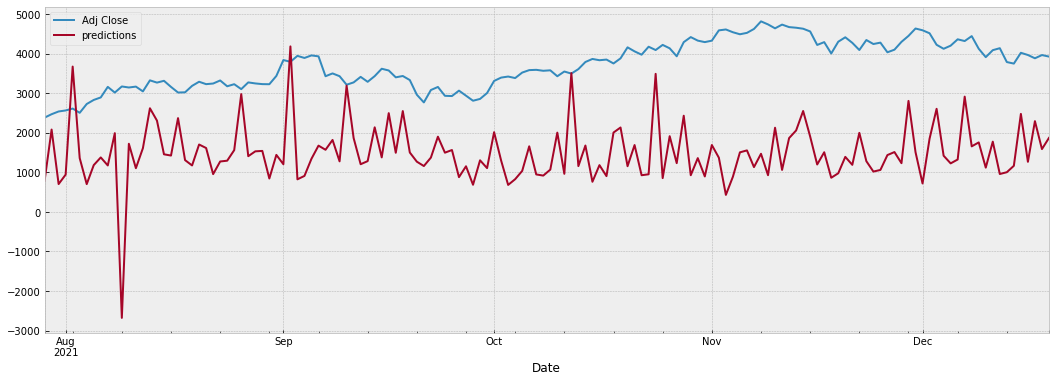

In [204]:
temp.plot(figsize=(18,6));

In [208]:
ETH_price_pred[0]

array([784.50627316])

In [211]:
ETH_price_pred[-1]

array([1868.51844413])

In [210]:
(ETH_price_pred[-1] - ETH_price_pred[0]) / ETH_price_pred[-1]

array([0.58014529])

0.393014500130355

 Features engineering : specific to quantative finance:
            
 HLP (HIGH LOW - volatility)
 Daily return
 Volume (raw)
 SMA (trailing 42 - 252 signal)


In [ ]:
SMA WMA / SMA42 - SMA252  

In [248]:
data['SMA42']  = data['Adj Close'].rolling(42).mean()
data['SMA252'] = data['Adj Close'].rolling(100).mean()

C:\Users\Eivanas\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Eivanas\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [249]:
data.fillna(0, inplace=True)

C:\Python37\lib\site-packages\pandas\core\frame.py:4468: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [250]:
plotthis = data.drop(['Volume', 'daily_returns', 'volatily'], 1)

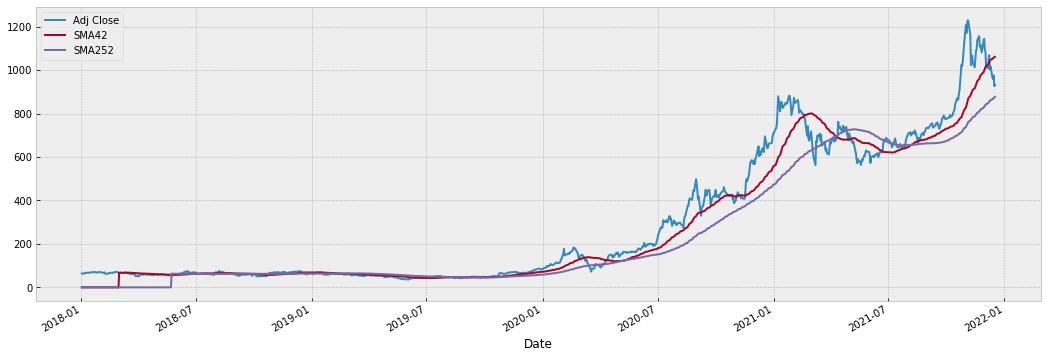

In [251]:
plotthis.plot(figsize=(18,6))

In [253]:
data['pos'] = np.where(data['SMA42'] > data['SMA252'], 1, -1)

C:\Users\Eivanas\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


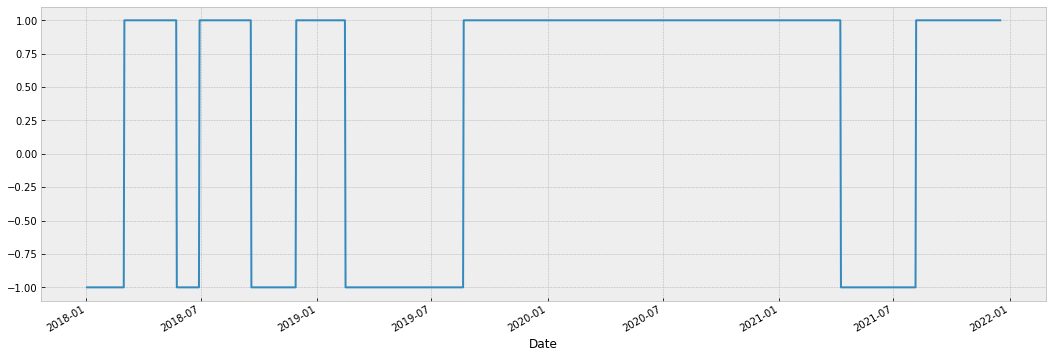

In [256]:
data['pos'].plot(
    ylim=[-1.1, 1.1],
    figsize=(18,6)
)